# Jupyter Notebook to demonstrate (linear) Regression Modeling for **OECD  Well-Being Data**

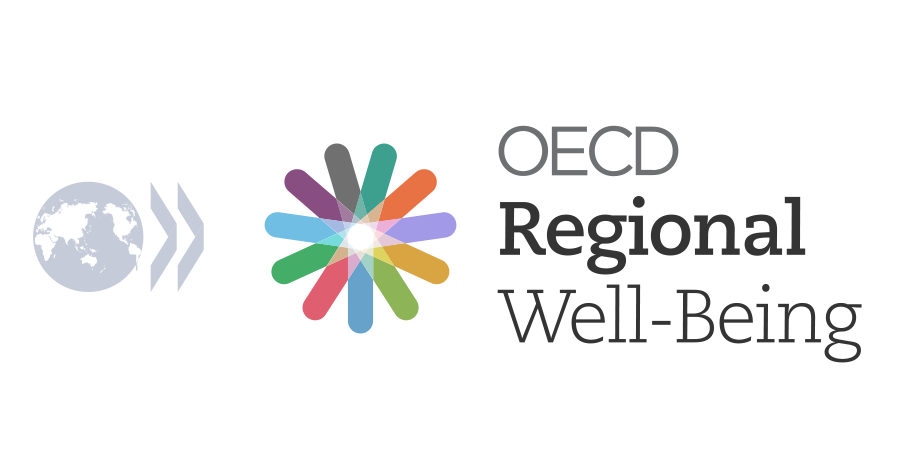

Linear Regression is a simple yet powerful and mostly used algorithm in data science. There are a plethora of real-world applications of Linear Regression.

Problem Statement and Example Data: Build a model which predicts the traget value ($Subjective\ well\ being$) based on ten different indicators ($Messwert_i$, $i=1,..10$)

Using this notebook, we will build a regression model to predict $Subjective\ well\ being$ using an appropriate predictor variables in the given OECD case study dataset.


Sources:
* [Kaggle](https://www.kaggle.com) Multiple Lineare Regression Notebooks and Tutorials
* [Analytics Vidhya Blog](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/) "Everything you need to Know about Linear Regression"

---
Author:
*   dr.daniel benninger  [> Linkedin](https://www.linkedin.com/in/danielbenninger/)

History:
*  v1, May 2024, dbe --- initial version for OECD Case Study BINA FS24  

---

## Setup Environment  - Load necessary Libraries and Functions

First, we need to import some libraries:  
* pandas: data manipulation and analysis
* numpy : library for scientific computing in Python, used for working with arrays and matrices
* matplotlib : plotting library for data visualization
* rcParams: to change the matplotlib properties like figure size
* seaborn: data visualization library based on matplotlib

* sklearn: machine learning library with algorithms and function to cope with regression problems
* statsmodels: Using statsmodels module classes and functions for linear regression
   
**Note:** Make sure they are installed already before importing them

In [100]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Import the data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

# configure plot area
rcParams['figure.figsize'] = 12, 8

## Reading and Understanding the Data

In [101]:
FILEpath = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/zDiversExamples/Notebook-Regression-with-OECD-Data/"
FILEname = "DATA_OECD_Summary-Messwerte1-11.csv"

oecd = pd.read_csv(FILEpath+FILEname, sep=';', decimal=',')

## Data Inspection

In [102]:
oecd.head()

,Country,CountryCode,Messwert1,Messwert2,Messwert3,Messwert4,Messwert5,Messwert6,Messwert7,Messwert8,Messwert9,Messwert10,Target_Subjective-well-being
0,Austria,AT,8.02,7.10,7.67,6.82,7.20,5.64,8.10,7.21,5.00,7.93,9.05
1,Belgium,BE,8.14,8.31,7.93,7.21,7.34,7.16,7.14,9.78,4.06,5.61,8.64
2,Czechia,CZ,7.61,6.12,6.93,5.16,5.53,5.85,6.97,4.00,5.32,5.79,6.70
3,Denmark,DK,8.70,8.51,7.11,8.43,7.54,6.64,8.44,9.08,4.57,8.77,7.80
4,Estonia,EE,4.68,5.16,6.91,5.58,3.19,9.09,5.47,4.26,8.24,4.80,5.92


In [103]:
oecd.info()
oecd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       28 non-null     object 
 1   CountryCode                   28 non-null     object 
 2   Messwert1                     28 non-null     float64
 3   Messwert2                     28 non-null     float64
 4   Messwert3                     28 non-null     float64
 5   Messwert4                     28 non-null     float64
 6   Messwert5                     28 non-null     float64
 7   Messwert6                     28 non-null     float64
 8   Messwert7                     28 non-null     float64
 9   Messwert8                     28 non-null     float64
 10  Messwert9                     28 non-null     float64
 11  Messwert10                    28 non-null     float64
 12  Target_Subjective-well-being  28 non-null     float64
dtypes: floa

(28, 13)

In [104]:
oecd.describe().T

,count,mean,std,min,25%,50%,75%,max
Messwert1,28.0,6.503214,1.968344,2.57,4.8525,6.935,8.1100,9.32
Messwert2,28.0,6.689643,1.385626,4.56,5.6725,6.610,8.1550,9.14
Messwert3,28.0,6.871786,1.346174,4.62,5.3800,7.085,7.9000,9.05
Messwert4,28.0,5.957857,1.773192,1.00,5.2275,5.805,7.0825,9.52
Messwert5,28.0,6.480714,2.194785,1.04,4.9475,7.370,7.9875,9.35
Messwert6,28.0,5.835000,1.975100,1.00,4.7650,5.885,7.2200,9.79
Messwert7,28.0,6.863929,1.945152,1.44,5.6725,7.080,8.2775,9.26
Messwert8,28.0,5.741071,2.368727,1.00,3.9375,5.255,7.3050,10.00
Messwert9,28.0,5.292500,2.195495,1.00,4.1575,4.855,6.2625,10.00
Messwert10,28.0,6.511429,2.080145,1.47,5.2400,6.740,8.0175,9.77


## Data Cleaning & Analysis

In [105]:
# Checking Null values
oecd.isnull().sum()*100/oecd.shape[0]

Country                         0.0
CountryCode                     0.0
Messwert1                       0.0
Messwert2                       0.0
Messwert3                       0.0
Messwert4                       0.0
Messwert5                       0.0
Messwert6                       0.0
Messwert7                       0.0
Messwert8                       0.0
Messwert9                       0.0
Messwert10                      0.0
Target_Subjective-well-being    0.0
dtype: float64

Note: There are no *NULL* values in the dataset, hence it is clean.

In [106]:
# define list of (effective) target values from oecd dataframe
oecd_Target =  list(oecd["Target_Subjective-well-being"])
print(oecd_Target)

[9.05, 8.64, 6.7, 7.8, 5.92, 9.87, 6.78, 6.56, 3.06, 3.47, 9.22, 7.97, 8.23, 5.82, 5.18, 3.74, 8.0, 9.29, 9.1, 7.48, 3.27, 5.16, 6.64, 6.16, 8.72, 9.46, 1.0, 8.23]


In [107]:
# define list of Country Codes and (effective) target values from oecd dataframe
oecd_CC =  list(oecd["CountryCode"])
#print(oecd_CC)

# define a simple index array
country_idx=[]
country_idx = [i for i in range(28)]
#print(country_idx)

# combine oecd_CC and country_idx arrays horizontally
country_array = np.stack((oecd_CC, country_idx))
print(country_array[0], country_array[1])

['AT' 'BE' 'CZ' 'DK' 'EE' 'FI' 'FR' 'DE' 'EL' 'HU' 'IS' 'IE' 'IL' 'IT'
 'LV' 'LT' 'LU' 'NL' 'NO' 'PL' 'PT' 'SK' 'SI' 'ES' 'SE' 'CH' 'TR' 'UK'] ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27']


## Exploratory Data Analysis

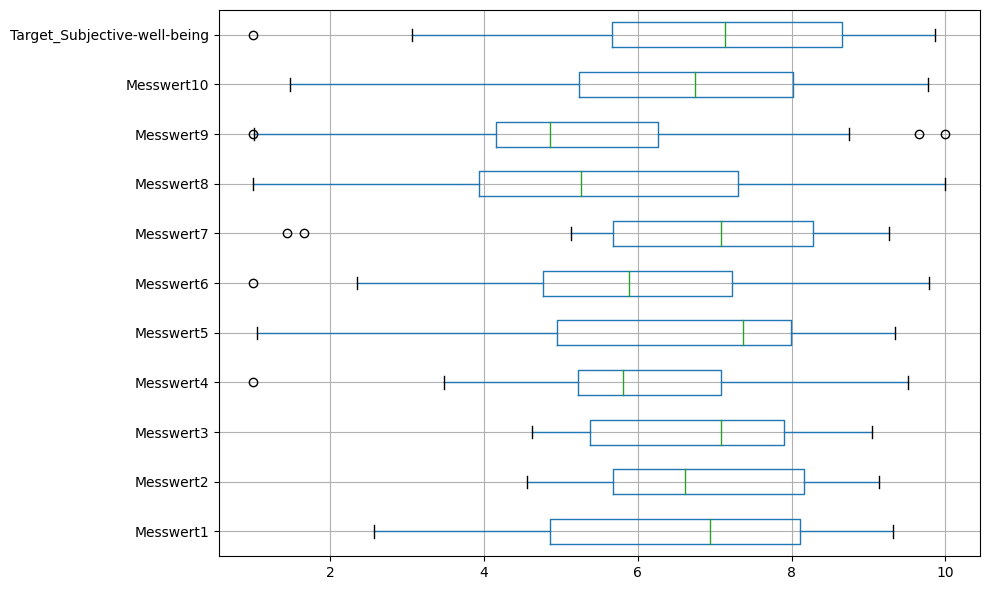

In [108]:
# Analysis with Box-Whisker Plots (Lageparameter Analyse)
plt.figure(figsize = (10,6))

plt1 =  oecd.boxplot(vert=False, showfliers=True, patch_artist=False)

plt.tight_layout()

Note: There are no considerable *outliers* present in the data.

<Figure size 1000x1000 with 0 Axes>

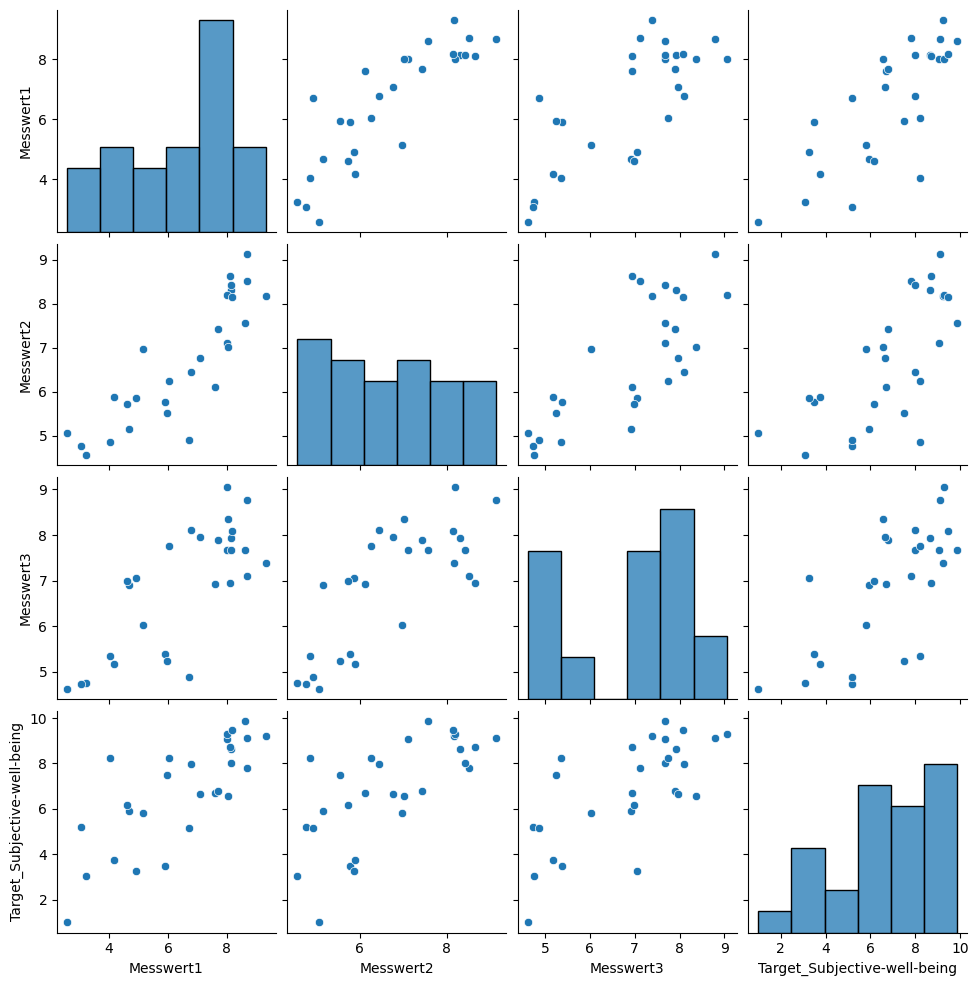

In [109]:
plt.figure(figsize = (10,10))

sns.pairplot(oecd, vars=['Messwert1', 'Messwert2', 'Messwert3', 'Target_Subjective-well-being'])

#plt.title('Pairplot: Correlation of (selected) Variables incl. Target Variable', loc='left')

plt.show()

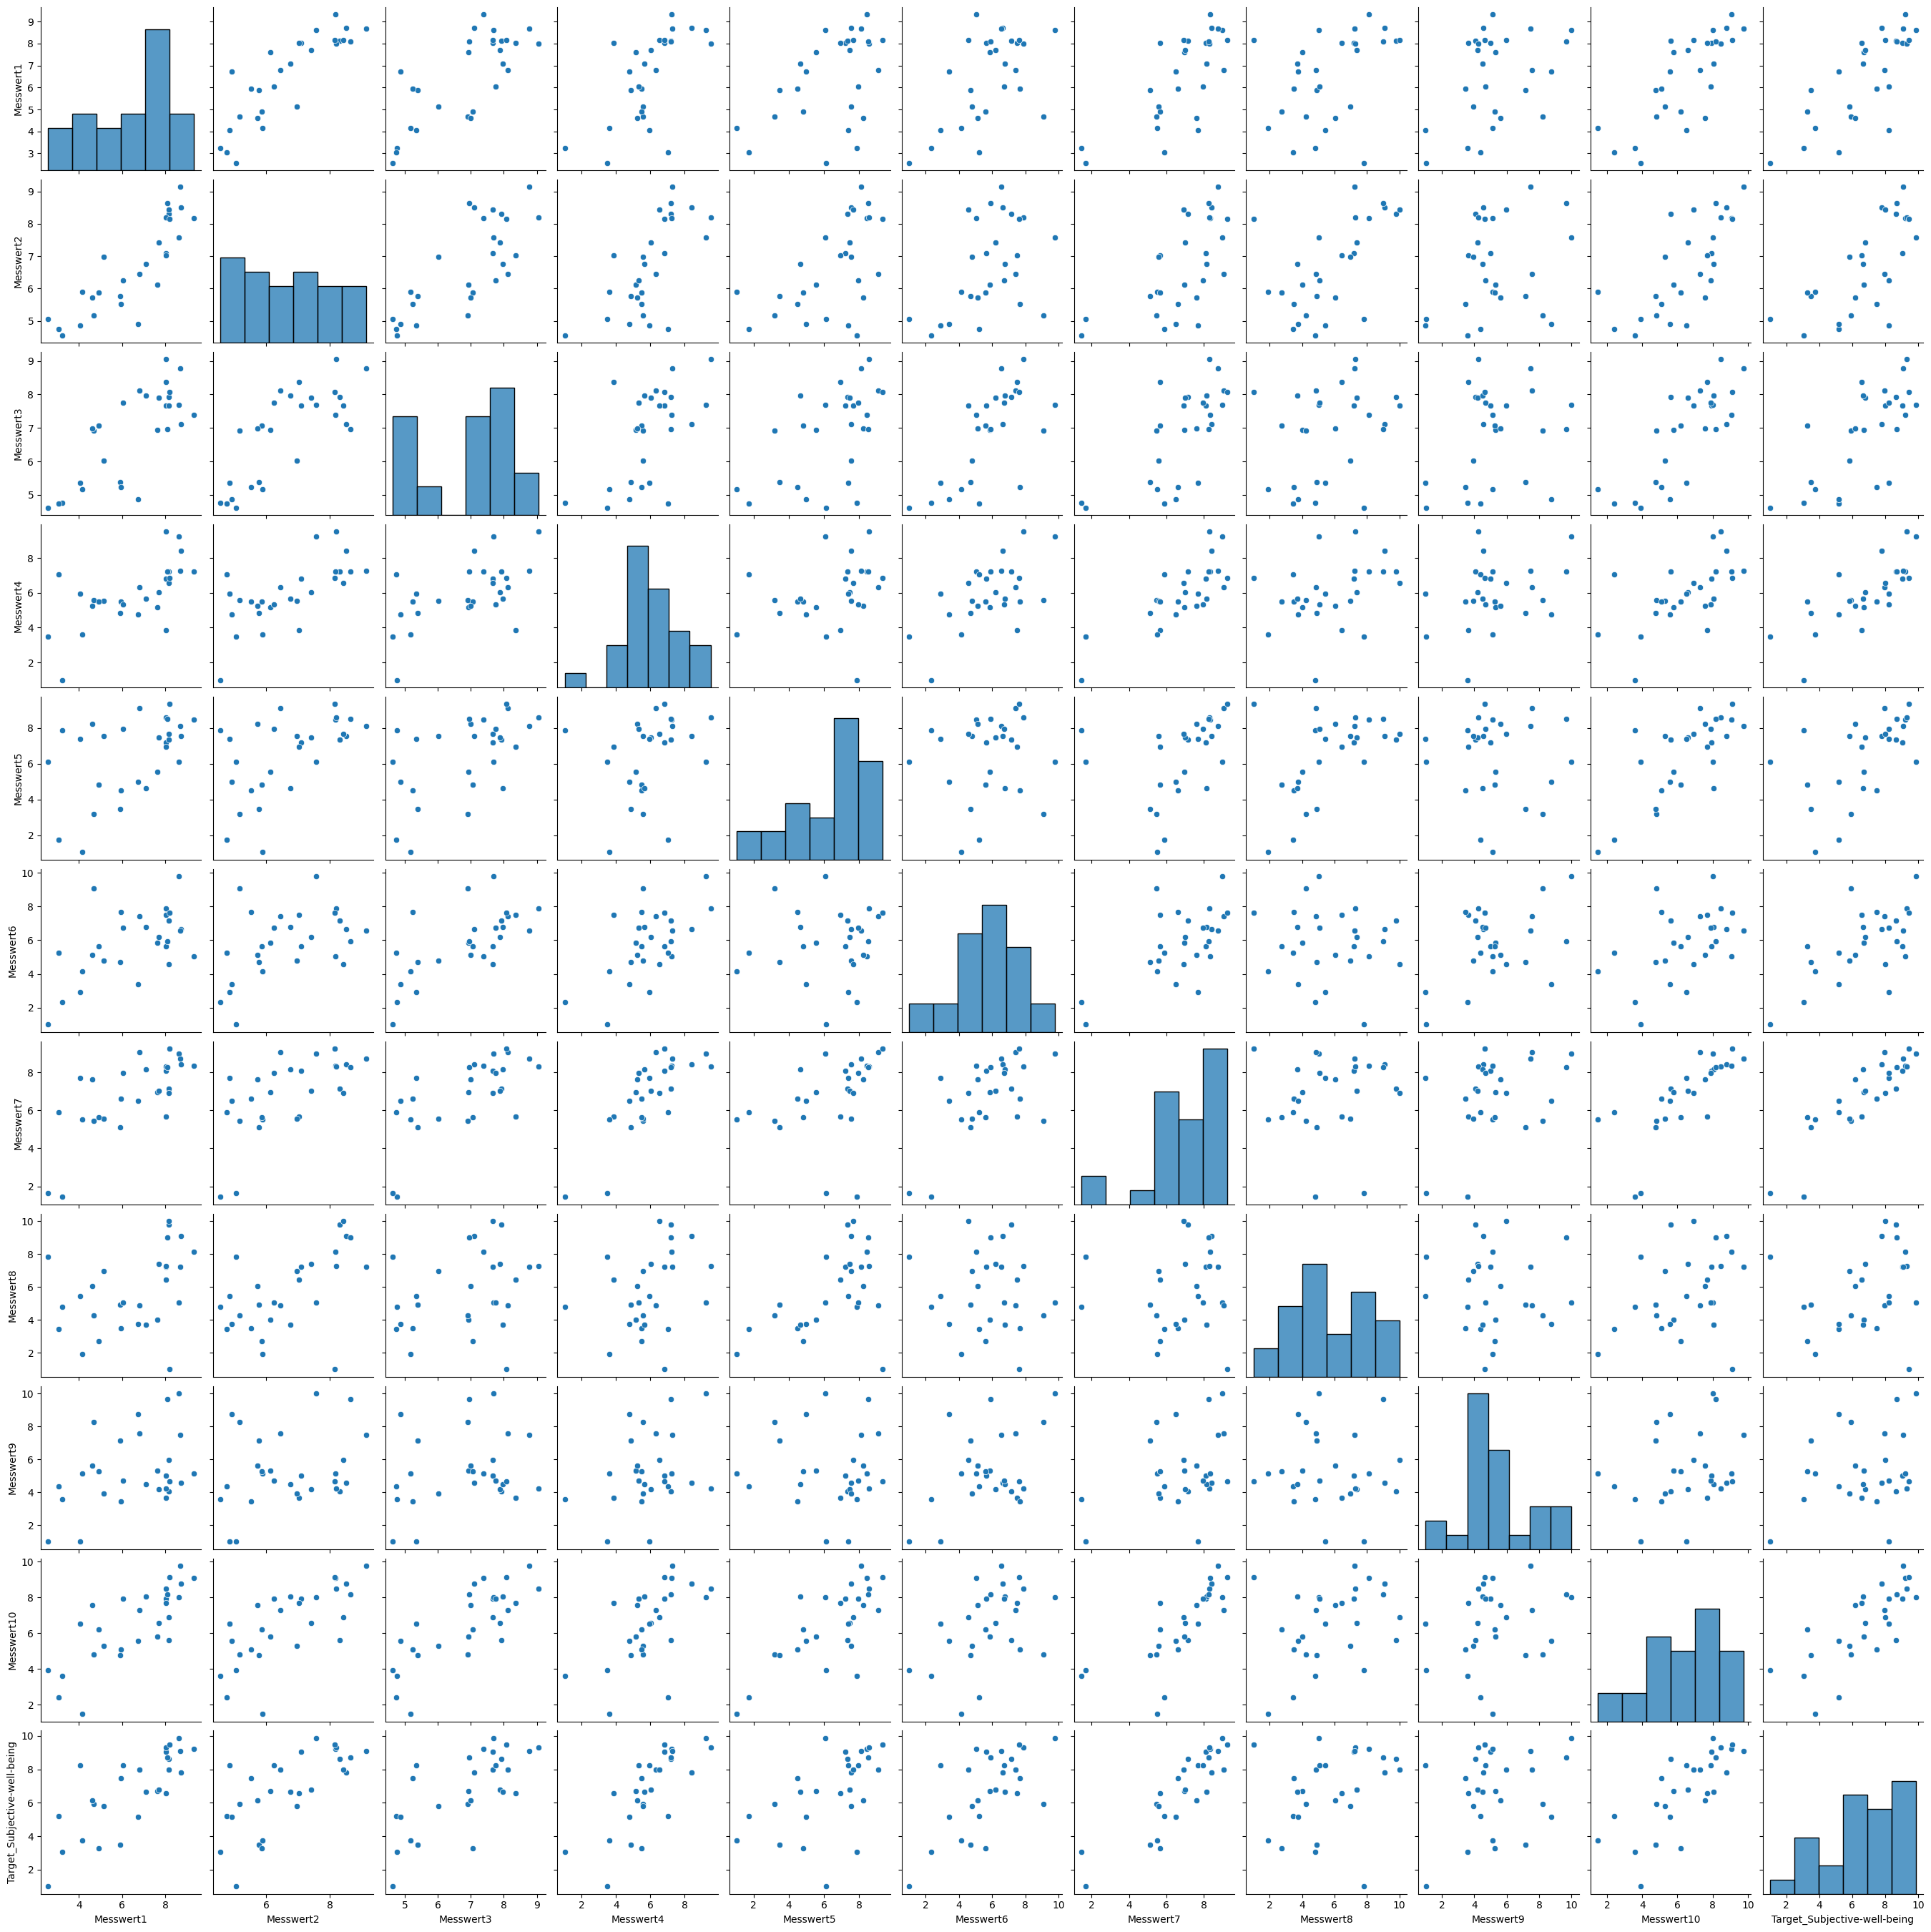

In [110]:
sns.pairplot(oecd)

---  
## **Regression Model Building**
---

### **Linear Regression** Model
The equation of linear regression:<br>
$y = \beta + \alpha_1x_1 + \alpha_2x_2 + ... + \alpha_nx_n$

-  $y$ is the response (*target*)
-  $\beta$ is the intercept
-  $\alpha_1$ is the coefficient for the first feature (*observation*)
-  $\alpha_n$ is the coefficient for the nth feature<br>

In our case:

$Subjective-well-being = \beta + \sum_{i=1}^{11} (\alpha_i \times Messwert_i$)

The $\beta$ and $\alpha_i$ ($i \in { 1,...,11}$) values are called the model **coefficients** or **model parameters**.

---

In [111]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [112]:
feature_names = ['Messwert1', 'Messwert2', 'Messwert3', 'Messwert4', 'Messwert5', 'Messwert6', 'Messwert7', 'Messwert8', 'Messwert9', 'Messwert10']

X = oecd[feature_names].values
y = oecd['Target_Subjective-well-being'].values

In [113]:
# compute linear regression model
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [114]:
model.intercept_, model.coef_ , model.n_features_in_

(-1.0709268866395325,
 array([ 0.30404705, -0.08776541, -0.3829753 ,  0.04249451,  0.36114227,
         0.39508918,  0.80823313,  0.12715049, -0.12824801, -0.21210252]),
 10)

In [115]:
# define dictionary with feature names and their corresponding (linear regression) coefficients
model_dictionary = {feature_names[i]:list(model.coef_)[i] for i in range(len(feature_names))}

print(model_dictionary)

{'Messwert1': 0.3040470486216113, 'Messwert2': -0.0877654086512677, 'Messwert3': -0.3829753023461222, 'Messwert4': 0.04249451012367498, 'Messwert5': 0.36114226799928983, 'Messwert6': 0.39508917574991104, 'Messwert7': 0.8082331335640411, 'Messwert8': 0.12715049196963055, 'Messwert9': -0.12824801176031986, 'Messwert10': -0.21210252283758418}


#### Define a single entry (OECD country) as test case for the computed linear regression model  

Extract feature values from target value

In [116]:
oecd_entry = list(oecd.loc[0, :])   # country data row at index 0 --> Austria / AT
oecd_entry

['Austria', 'AT', 8.02, 7.1, 7.67, 6.82, 7.2, 5.64, 8.1, 7.21, 5.0, 7.93, 9.05]

In [117]:
del oecd_entry[:2]
oecd_entry_target =oecd_entry.pop()
oecd_entry_target

9.05

In [118]:
# new data - for prediction - with values for each variable (Messwertx) but without target variable value
new_data = np.array([oecd_entry]).reshape(1,-1)
new_data

array([[8.02, 7.1 , 7.67, 6.82, 7.2 , 5.64, 8.1 , 7.21, 5.  , 7.93]])

In [119]:
# Predicting the target variable ("Subjective-well-being")
predicted_target = model.predict(new_data)

print("Real      target value:", oecd_entry_target, "\nPredicted target value:", "%.2f" % predicted_target[0], "\nResidual: ", "%.2f" % (oecd_entry_target-predicted_target[0]))

Real      target value: 9.05 
Predicted target value: 8.07 
Residual:  0.98


#### Compare (by regression) predicted target value with the real target value for each country

In [120]:
y_target = []
y_target_predicted = []

idx_max = 29  # no of countries in dataframe oecd

for idx in range(0,idx_max-1):
  oecd_idx = list(oecd.loc[idx, :])
  del oecd_idx[:2]

  y_target.append(oecd_idx.pop())

  new_data = np.array([oecd_idx]).reshape(1,-1)
  y_target_predicted.append(float(model.predict(new_data)[0]))


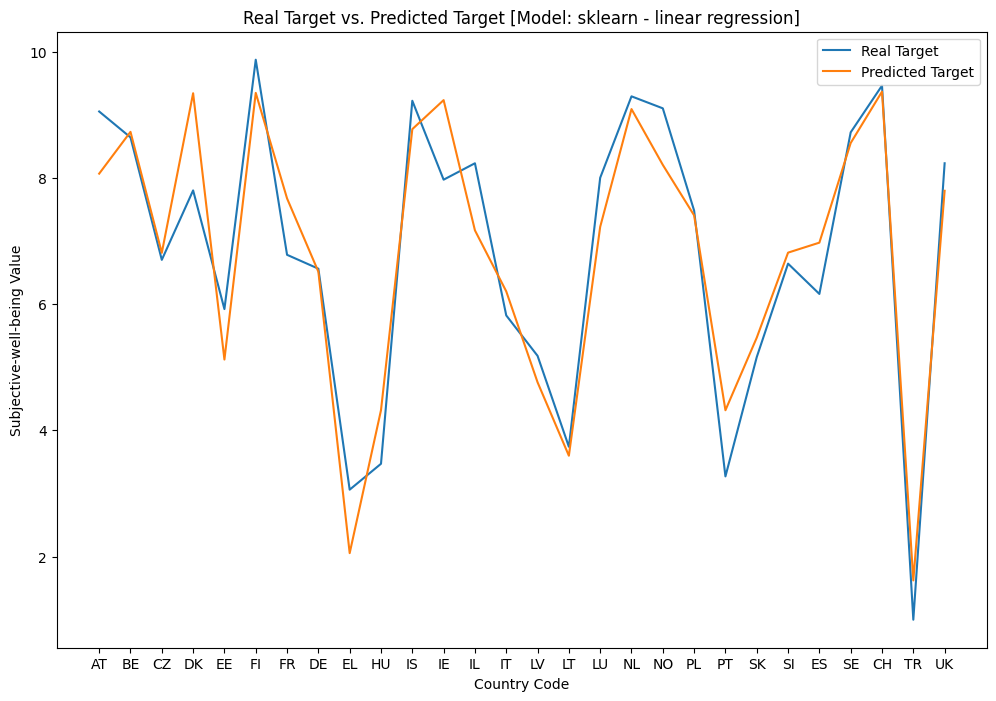

In [121]:
plt.plot(oecd_CC, y_target, label='Real Target')
plt.plot(y_target_predicted, label='Predicted Target')

plt.ylabel("Subjective-well-being Value")
plt.xlabel("Country Code")
plt.legend()
plt.title('Real Target vs. Predicted Target [Model: sklearn - linear regression]')

plt.savefig("Linear-Regression_Real-vs-Predicted-Target.png")
plt.show()

#### Looking at the key statistic values of the calculated linear model

In [122]:
target_array = np.array(y_target)
predicted_array = np.array(y_target_predicted)

In [123]:
#Returns mean absolute error (MAE)
residual_MAE = (np.sum(np.abs(np.abs(target_array) - np.abs(predicted_array)))) / len(target_array)

print("Mean Absolute  Error (MAE):",residual_MAE)

Mean Absolute  Error (MAE): 0.5775408654136475


In [124]:
from sklearn.metrics import mean_squared_error

#Returns the mean squared error (RMSE)
residual_RMSE = np.sqrt(mean_squared_error(target_array, predicted_array))
print('Root Mean Squared Error (RMSE): ', residual_RMSE)

Root Mean Squared Error (RMSE):  0.7074508255453521


---  
### **Stochastic Gradient Descent** Regression

A key optimization technique for training models in deep learning and machine learning is stochastic gradient descent (SGD). Using a single randomly selected data point (or a small batch of data) at each iteration, SGD changes the model’s parameters in contrast to classic gradient descent methods, which compute the gradient of the loss function by taking into account the entire dataset. As a result, there is some stochasticity introduced, which speeds up and strengthens the optimization process against noisy data.

By iteratively changing the model’s parameters in the direction of the negative gradient, SGD seeks to minimize the cost or loss function. The “stochastic” feature enables the algorithm to break free from local minima and conduct a more exhaustive exploration of the parameter space. However, it also necessitates cautious hyperparameter optimization and can result in noisy updates.


> *see [Kaggle](https://www.kaggle.com/code/iamvaibhav100/sdgregressor-vs-linearregression) for a comparison of Linear Regression vs. Stochastic Gradient Descent Regression*

In [125]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [126]:
# implmenting sgd regressor
sgd_regressor = SGDRegressor(
    max_iter=100, alpha=0.0001, learning_rate='invscaling', random_state=42)

In [127]:
sgd_regressor.fit(X, y)

SGDRegressor(max_iter=100, random_state=42)

In [128]:
sgd_regressor.intercept_, sgd_regressor.coef_ , sgd_regressor.n_features_in_

(array([-0.12365958]),
 array([ 0.11611084,  0.10371063, -0.31196968,  0.44166662,  0.40825955,
         0.16797275,  0.4444577 , -0.09393442, -0.10499754, -0.13028839]),
 10)

In [129]:
y_pred = sgd_regressor.predict(X)

#and the residuals againts the original target values
res = (y - y_pred)
#print(res)

In [130]:
# define dictionary with feature names and their corresponding (SGD) coefficients
sgd_dictionary = {feature_names[i]:list(sgd_regressor.coef_)[i] for i in range(len(feature_names))}

print(sgd_dictionary)

{'Messwert1': 0.11611083994577462, 'Messwert2': 0.10371062590564935, 'Messwert3': -0.31196968310760653, 'Messwert4': 0.4416666218787948, 'Messwert5': 0.4082595529233865, 'Messwert6': 0.1679727515792357, 'Messwert7': 0.4444577036220968, 'Messwert8': -0.09393441978239848, 'Messwert9': -0.10499753869323884, 'Messwert10': -0.1302883929553901}


#### Use a single entry (OECD country) as test case for the computed SGD model  

In [131]:
# use previously defined country sample as test case
new_data

array([[6.04, 6.25, 7.75, 5.33, 7.94, 6.72, 7.96, 5.07, 4.71, 7.91]])

In [149]:
# Predicting the target variable ("Subjective-well-being")
predicted_target = sgd_regressor.predict(new_data2)

print("Real      target value:", oecd_entry_target, "\nPredicted target value:", "%.2f" % predicted_target[0], "\nResidual: ", "%.2f" % (oecd_entry_target-predicted_target[0]))

Real      target value: 9.05 
Predicted target value: 5.82 
Residual:  3.23


In [150]:
# define ad hoc feature values as test case 2
new_data2 = np.array([[3.01, 7.25, 6.57, 3.55, 8.14, 5.27, 6.79, 7.05, 3.17, 6.99]])
new_data2

array([[3.01, 7.25, 6.57, 3.55, 8.14, 5.27, 6.79, 7.05, 3.17, 6.99]])

In [151]:
predicted_target = sgd_regressor.predict(new_data2)
print("Predicted target value:", "%.2f" % predicted_target[0])

Predicted target value: 5.82


#### Compare (by regression) predicted target value with the real target value for each country

In [133]:
y_target = []
y_target_predicted = []

idx_max = 29  # no of countries in dataframe oecd

for idx in range(0,idx_max-1):
  oecd_idx = list(oecd.loc[idx, :])
  del oecd_idx[:2]

  y_target.append(oecd_idx.pop())

  new_data = np.array([oecd_idx]).reshape(1,-1)
  y_target_predicted.append(float(sgd_regressor.predict(new_data)[0]))

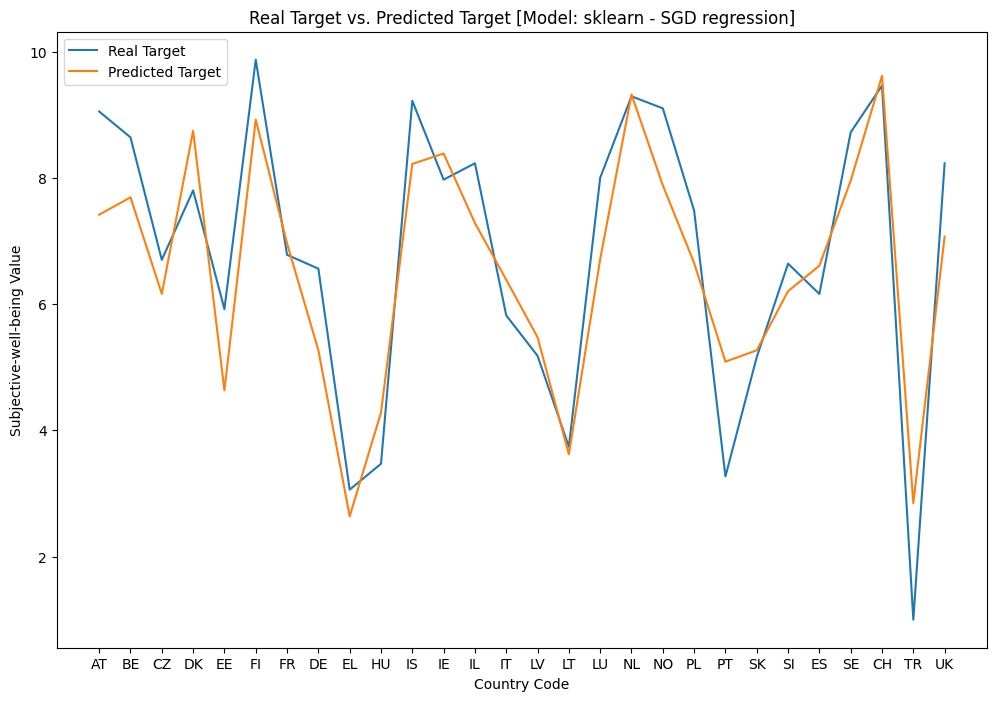

In [134]:
plt.plot(oecd_CC, y_target,  label='Real Target')
plt.plot(y_target_predicted, label='Predicted Target')

plt.ylabel("Subjective-well-being Value")
plt.xlabel("Country Code")
plt.legend()
plt.title('Real Target vs. Predicted Target [Model: sklearn - SGD regression]')

plt.savefig("SGD-Regression_Real-vs-Predicted-Target.png")
plt.show()

---  
---  
## Yet Another **Linear Regression** Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [135]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`.  

And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the **Ordinary Least Squares** (`OLS`) attribute of `statsmodels` as shown below

In [136]:
# Add a constant to get an intercept
X_sm = sm.add_constant(X)

# Fit the Regression Line using 'OLS' (ordinary least square)
lin_regressor = sm.OLS(y, X_sm).fit()


In [137]:
# Print the regression parameters,
# i.e. the intercept and the slope of the fitted regression line
lin_regressor.params

array([-1.07092689,  0.30404705, -0.08776541, -0.3829753 ,  0.04249451,
        0.36114227,  0.39508918,  0.80823313,  0.12715049, -0.12824801,
       -0.21210252])

In [138]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lin_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     15.58
Date:                Thu, 16 May 2024   Prob (F-statistic):           1.14e-06
Time:                        08:48:07   Log-Likelihood:                -30.040
No. Observations:                  28   AIC:                             82.08
Df Residuals:                      17   BIC:                             96.73
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0709      1.159     -0.924      0.3

###  Key Statistics of the Linear Model
Looking at the key values from the summary above of the linear model, we are concerned with:   
1. The coefficients and significance (**p-values**)
2. **R-squared**
3. **F statistic** and its significance

### Model **Evaluation**

**Residual analysis**, to validate assumptions of the model, and hence the reliability for inference

#### Distribution of the Error Terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the *histogram of the error terms* and see what it looks like.

In [139]:
#compute the predicted target variable
y_pred = lin_regressor.predict(X_sm)

#and the residuals againts the original target values
res = (y - y_pred)

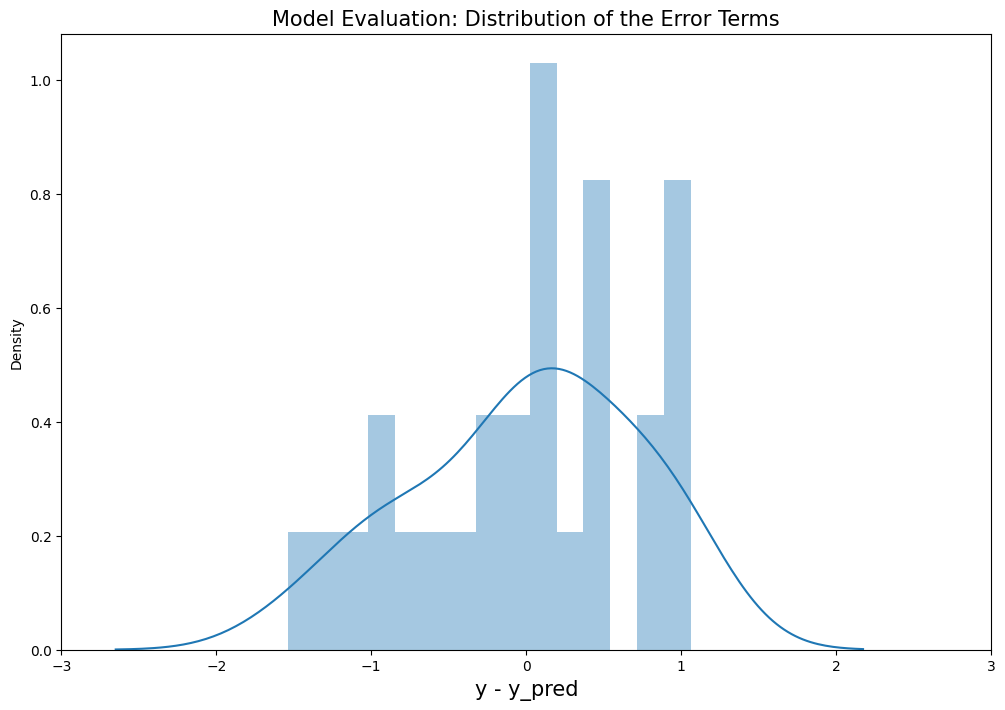

In [140]:
plt.figure()
plt.figsize = (10,5)

sns.distplot(res, bins = 15)

plt.title('Model Evaluation: Distribution of the Error Terms', fontsize = 15)
plt.xlabel('y - y_pred', fontsize = 15)         # X-label
plt.xlim([-3,3])

plt.show()

Note: The residuals are following the *normally distributed with a mean 0*. All good!

#### Looking for patterns in the residuals

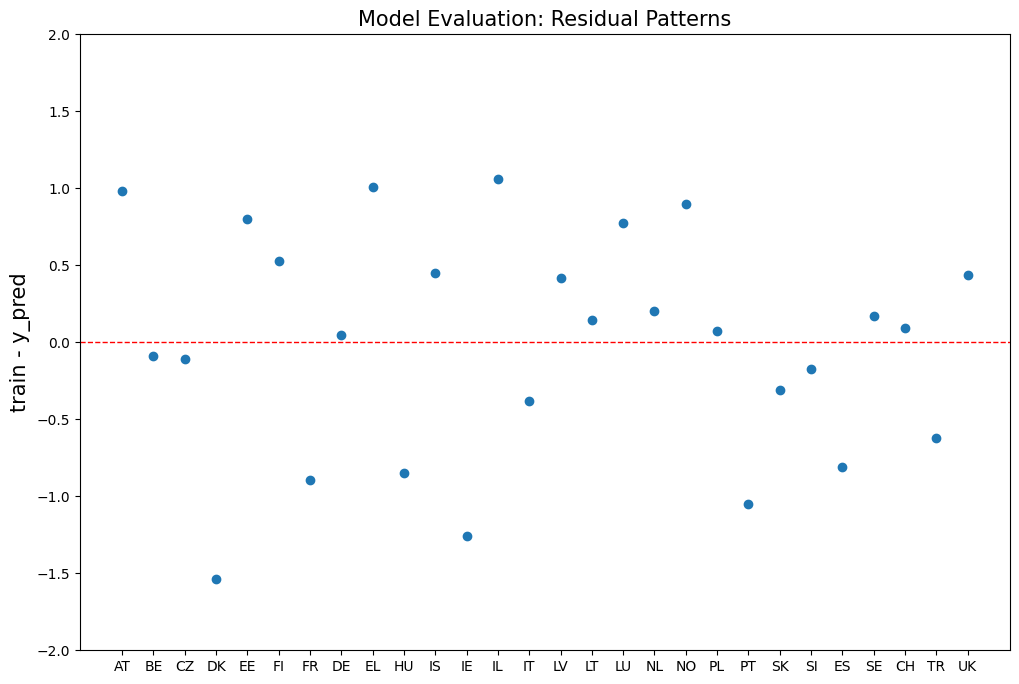

In [141]:
plt.figsize = (10,5)

plt.scatter(oecd_CC,res)
plt.axhline(y=0, color='r', linewidth=1, linestyle='--')

plt.title('Model Evaluation: Residual Patterns', fontsize = 15)
plt.ylabel('train - y_pred', fontsize = 15)         # Y-label
plt.ylim([-2,2])

plt.show()

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

##### Looking at the Root Mean Squared Error (RMSE) on the test set

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [143]:
#Returns the mean squared error (RMSE); we'll take a square root
RMSE = np.sqrt(mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE): ', RMSE)

Root Mean Squared Error (RMSE):  0.7074508255453518


##### Checking the R-squared on the test set

In [144]:
r_squared = r2_score(y, y_pred)
print('R-squared: ',r_squared)

R-squared:  0.9016139407959869
